In [1]:
import numpy as np
import math
import sys
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import itertools
import os

In [2]:
from javaconnector import KronosModelConnector

kronos = KronosModelConnector()

In [3]:
def policyOut(kronos,rec_policy):
    dirFile= "conf/Model-Config_ZA_TP2.xlsx"
    kronos.load_config(dirFile)
    num_quarters= kronos.conf.sim_length_months/3
    
    kronos.conf.clear_input_rate_schedules()


    for i in range(0, int(num_quarters)):
        kronos.conf.add_input_rate_schedule(i, "Sailor", rec_policy[1][i] )
        kronos.conf.add_input_rate_schedule(i, "Officer",rec_policy[0][i] )
    
    kronos.init_model()
    kronos.conf.set_slot_mode("ZERO_AVAILABLILTY")
 
    kronos.main.write_output = False;

    kronos.run_model()
    
    sailors = kronos.main.get_workforce( "Sailor" )
    officers = kronos.main.get_workforce( "Officer" )
    
    return  dataset2list(kronos.main.crewable_platformsDS), dataset2list(kronos.main.deployed_platformsDS) , dataset2list(kronos.main.docked_platformsDS) , dataset2list(sailors.rank_1_gapDS), dataset2list(sailors.rank_2_gapDS), dataset2list(sailors.rank_3_gapDS), dataset2list(sailors.rank_4_gapDS),dataset2list(officers.rank_1_gapDS), dataset2list(officers.rank_2_gapDS), dataset2list(officers.rank_3_gapDS), dataset2list(officers.rank_4_gapDS)

In [4]:
def dataset2list(dataSet):
    List=[]
    for idx in range(0, dataSet.size()):
        List.append(dataSet.getY(idx))
    return List

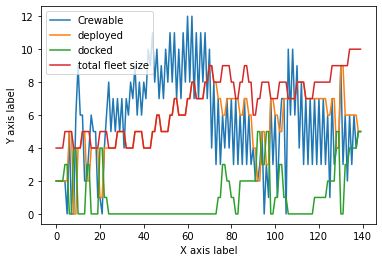

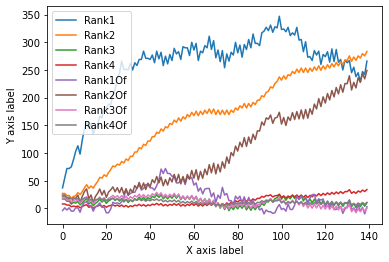

In [5]:
rec_Policy= [[ 0,  5,  0,  4,  0,  0, 10,  0,  0, 12,  6,  1,  3,  0,  0,  8,  4,
        5,  0,  0,  0,  0,  9, 12,  4,  1,  6,  4, 18, 14,  0,  3, 10,  0,
       16,  6,  0,  3, 17,  0,  2,  0,  4,  8, 20, 20,  4,  9,  1,  0,  5,
        0,  0,  0, 19,  3,  1, 14,  9,  2,  0,  4,  1,  6,  3,  9, 15,  0,
        1,  7,  1, 13, 10, 20,  2,  3,  3,  0,  4, 16,  7,  5,  0, 11,  2,
       13,  4,  4,  3,  0,  0,  3,  0,  7,  3,  0,  7,  1, 13,  6,  5,  2,
        9, 13,  0,  0, 20, 16,  8,  6, 13,  0,  6, 10, 20,  0,  0,  6, 14,
        2,  0,  9,  3,  9,  2,  0, 18,  1,  2,  8, 12, 12,  0,  4,  8, 12,
        0,  7,  0, 13],[ 2, 18, 25,  0, 15, 13, 23, 10,  1, 25, 21, 12,  9,  8,  1, 13,  5,
       19, 12, 20, 18,  7,  3, 19, 20, 21, 25, 22,  5,  0, 19, 12,  4, 13,
       11, 11, 20, 15,  7,  0, 14,  8,  2, 21,  6, 12,  0, 17,  6, 17,  9,
       22, 14,  4, 14, 23, 22,  0, 10, 24, 14, 12,  1, 17, 25, 13, 24, 21,
        8, 16,  5, 14, 11, 20,  1, 25, 19, 16, 19, 23,  5, 14,  2, 23, 23,
       18, 13, 25,  7,  0, 12, 23, 23,  7,  6, 10,  7, 10,  6, 21,  4,  1,
       23,  8,  5,  5, 20, 14,  5,  1, 10, 18,  4,  1, 21, 18, 20,  7,  8,
       18, 24,  9,  9, 24,  5, 22,  5,  5,  9, 18, 11,  4, 14, 10, 11,  7,
        7, 19, 19, 24]]
a,b,c,d,e,f,g,h,i1,j,k=policyOut(kronos,rec_Policy)
 #a=crewable, b=deployed c=docked d=sailorR1 e=sailorR2 f=sailor2R3 g=sailorR4,
    #h=officerR1 i1=officerR2 j=officerR3 k=officerR4

fig1 = plt.figure()
rect = fig1.patch
rect.set_facecolor("white")
plt.plot(a, label="Crewable")
plt.plot(b,label='deployed')
plt.plot(c,label='docked')
plt.plot((np.add(b,c)),label='total fleet size')
plt.legend()
plt.xlabel("X axis label")
plt.ylabel("Y axis label")
filename='AvailPlot'
i = 0
while True:
    i += 1
    newname = '{}{:d}.png'.format(filename, i)
    if os.path.exists(newname):
        continue
    plt.savefig(newname)
    break
#['Crewable','deployed','docked'])
fig2 = plt.figure()
rect = fig2.patch
rect.set_facecolor("white")
plt.plot(d,label='Rank1')
plt.plot(e,label='Rank2')
plt.plot(f,label='Rank3')
plt.plot(g,label='Rank4')
plt.plot(h,label='Rank1Of')
plt.plot(i1,label='Rank2Of')
plt.plot(j,label='Rank3Of')
plt.plot(k,label='Rank4Of')
plt.legend()
plt.xlabel("X axis label")
plt.ylabel("Y axis label")
filename='SurplusPlot'
i = 0
while True:
    i += 1
    newname = '{}{:d}.png'.format(filename, i)
    if os.path.exists(newname):
        continue
    plt.savefig(newname)
    break
# Save the figure as a PNG
plt.show()
